In [1]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'worldwide-coffee-habits-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5452689%2F9044297%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240728%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240728T024900Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5a002c2bca9c1bb556d71bd855ff0ed419b945dc7fe5efb379815f7add6c8fa04a8de5ea27159cbe7ffc13dbd475337df598fd1f0bc9d33151057253fc59f08ea54d122f0cb9a600f3823a81e4274f1199450a3124d501f636ab87ca42a2933e5cbea786252709daf557a5625a877eb3d7245315680e751aadd309a4c341aec7ccf5d7846d1973e0f4bf5c8721fe6508d3051ba220b4f33d7758cef09e9b1d50b37200b3043b8af17a572149cc59e7606e245f6d0bc975048d2c6fbb2cf83fdee06b4c071d7c747c370975cb4eff7a1033973d99803a8d0a87be581a04778284338643eb51c0601cfb4cc287bc8b6a17f02f0c987cf72f909804600f23f6e589'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


El sistema no puede encontrar la ruta especificada.


OSError: [WinError 1314] El cliente no dispone de un privilegio requerido: '/kaggle/input' -> '..\\input'

In [ ]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated*", category=FutureWarning)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/worldwide-coffee-habits-dataset/worldwide_coffee_habits.csv


In [ ]:
# Load the data
data = pd.read_csv("/kaggle/input/worldwide-coffee-habits-dataset/worldwide_coffee_habits.csv")
data.head()

,Country,Year,Coffee Consumption (kg per capita per year),Average Coffee Price (USD per kg),Type of Coffee Consumed,Population (millions)
0,Country_39,2023,9.253939,6.467453,Americano,65.929478
1,Country_29,2011,9.981203,4.346744,Mocha,82.456680
2,Country_15,2020,3.312916,8.767496,Latte,110.938862
3,Country_43,2005,2.436180,11.748750,Espresso,43.137207
4,Country_8,2019,4.637849,8.999099,Mocha,65.484262


# Exploring the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Country                                      10000 non-null  object 
 1   Year                                         10000 non-null  int64  
 2   Coffee Consumption (kg per capita per year)  10000 non-null  float64
 3   Average Coffee Price (USD per kg)            10000 non-null  float64
 4   Type of Coffee Consumed                      10000 non-null  object 
 5   Population (millions)                        10000 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 468.9+ KB


# Fields and data types 🗒️:

This dataset offers a detailed look into coffee consumption patterns across various countries, providing valuable insights into how coffee is enjoyed around the world.

| Parameter                                  | Description                                                                                                                                                           |
|--------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Country: |The name of the country where the data was collected.
|Year: |The year of the record, spanning from 2000 to 2023.
|Coffee Consumption (kg per capita per year): |The amount of coffee consumed per person annually, offering a glimpse into the coffee habits of different nations.
|Average Coffee Price (USD per kg): |The average price of coffee per kilogram in US dollars, reflecting economic aspects of coffee consumption.
|Type of Coffee Consumed: |Insights into the most popular types of coffee enjoyed in each country, such as Espresso, Latte, Cappuccino, Americano, and Mocha.
|Population (millions): |The estimated population of each country, providing context for coffee consumption figures.

In [ ]:
# Display the dimensions of the dataset
data.shape

(10000, 6)

In [ ]:
# Display descriptive statistics of the dataset
data.describe()

,Year,Coffee Consumption (kg per capita per year),Average Coffee Price (USD per kg),Population (millions)
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,2011.666900,6.061865,9.461891,75.167120
std,6.911695,2.313427,3.151403,43.023176
min,2000.000000,2.000385,4.000742,1.002494
25%,2006.000000,4.070743,6.728261,37.465847
50%,2012.000000,6.094491,9.458371,75.021943
75%,2018.000000,8.061127,12.136285,112.595868
max,2023.000000,9.999399,14.997053,149.995850


In [ ]:
# Display columns names of the dataset
data.columns.values

array(['Country', 'Year', 'Coffee Consumption (kg per capita per year)',
       'Average Coffee Price (USD per kg)', 'Type of Coffee Consumed',
       'Population (millions)'], dtype=object)

In [ ]:
# Renames the dataset and removes the space
data=data.rename(columns={
    "Coffee Consumption (kg per capita per year)":"Coffe_Consumption",
    "Average Coffee Price (USD per kg)":"AVG_CoffePrice",
    "Type of Coffee Consumed":"Type_of_Coffee_Consumed",
    "Population (millions)":"Population"
    })
data.head()

,Country,Year,Coffe_Consumption,AVG_CoffePrice,Type_of_Coffee_Consumed,Population
0,Country_39,2023,9.253939,6.467453,Americano,65.929478
1,Country_29,2011,9.981203,4.346744,Mocha,82.456680
2,Country_15,2020,3.312916,8.767496,Latte,110.938862
3,Country_43,2005,2.436180,11.748750,Espresso,43.137207
4,Country_8,2019,4.637849,8.999099,Mocha,65.484262


In [ ]:
data.Year.value_counts()

Year
2014    455
2015    447
2019    434
2020    433
2016    433
2012    431
2021    431
2018    429
2000    428
2017    422
2009    422
2023    419
2003    418
2022    417
2006    417
2008    415
2011    415
2013    404
2007    400
2005    400
2004    396
2002    390
2001    385
2010    359
Name: count, dtype: int64

In [ ]:
data.Type_of_Coffee_Consumed.value_counts()

Type_of_Coffee_Consumed
Latte         2071
Cappuccino    2001
Mocha         1984
Americano     1975
Espresso      1969
Name: count, dtype: int64

# Handling missing data

In [ ]:
# Missing data
data.isnull().sum()

Country                    0
Year                       0
Coffe_Consumption          0
AVG_CoffePrice             0
Type_of_Coffee_Consumed    0
Population                 0
dtype: int64

# EDA (Exploratory Data Analysis)

In [ ]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print all numerical data
print([numerical_columns])

[Index(['Year', 'Coffe_Consumption', 'AVG_CoffePrice', 'Population'], dtype='object')]


<ipython-input-13-ad63bd2dcd1b>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


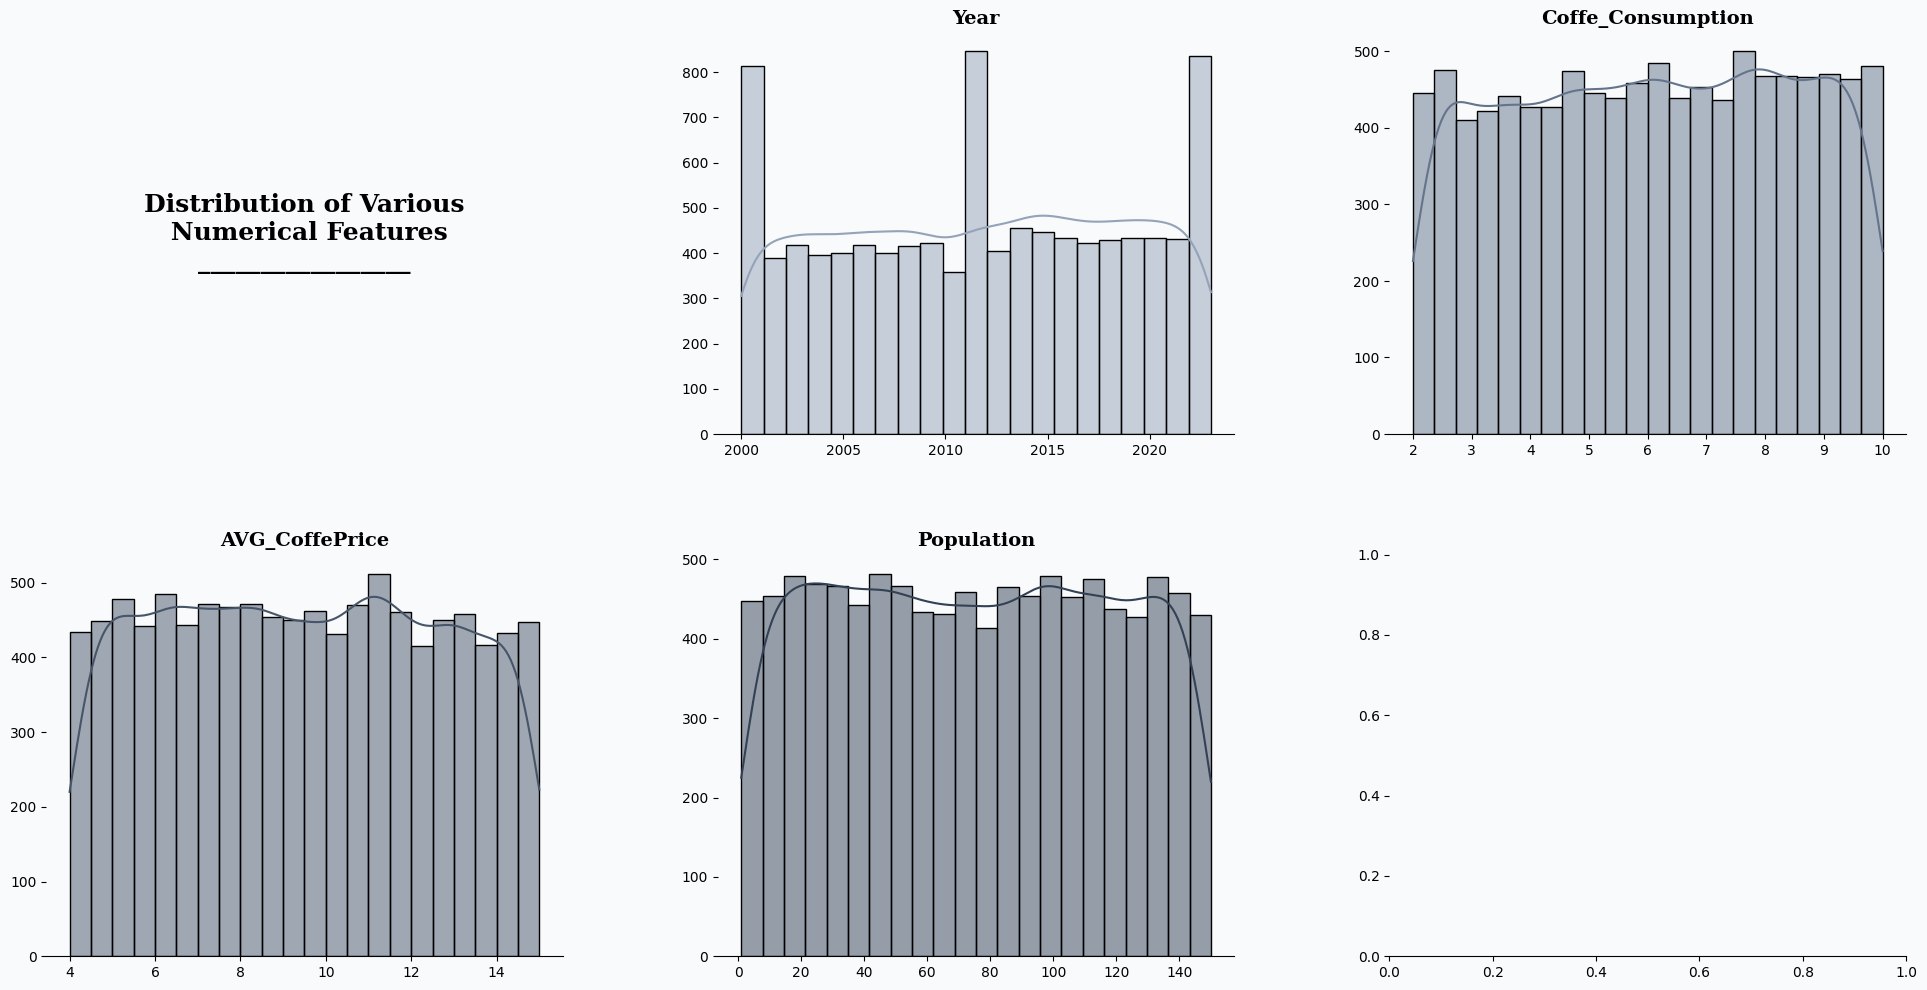

In [ ]:
# Plot distributions for numerical features
fig = plt.figure(figsize=(24, 12))
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.3, hspace=0.3)
axes = []

background_color = "#f8fafc"
color_palette = ["#94a3b8", "#64748b", "#475569", "#334155", "#1e293b"]
fig.patch.set_facecolor(background_color)

for i in range(2):
    for j in range(3):
        ax = fig.add_subplot(gs[i, j])
        axes.append(ax)

for ax in axes:
    ax.set_facecolor(background_color)

# Title of the plot
axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Distribution of Various\n Numerical Features\n_________________',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif',
             color="#000000")

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    ax = axes[i + 1]  # Comienza desde el segundo subplot
    sns.histplot(data[col], kde=True, ax=ax, color=color_palette[i % len(color_palette)])
    ax.set_title(col, fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
    ax.set_xlabel("")
    ax.set_ylabel("")

for ax in axes[1:]:
    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)

plt.tight_layout()
plt.show()

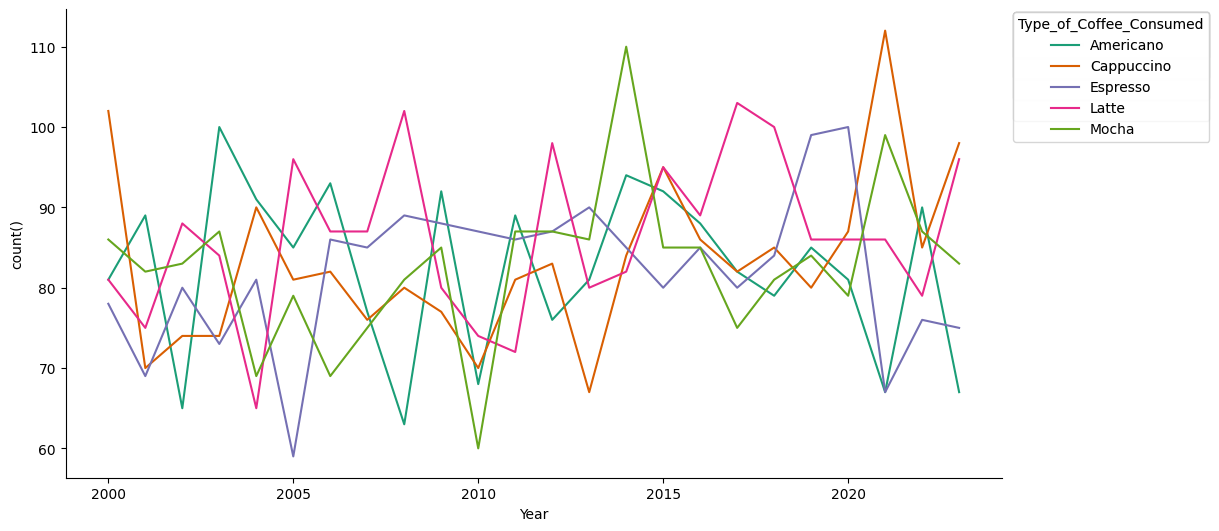

In [ ]:
# Years vs Count
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
data_sorted = data.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(data_sorted.groupby('Type_of_Coffee_Consumed')):
  _plot_series(series, series_name, i)
  fig.legend(title='Type_of_Coffee_Consumed', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

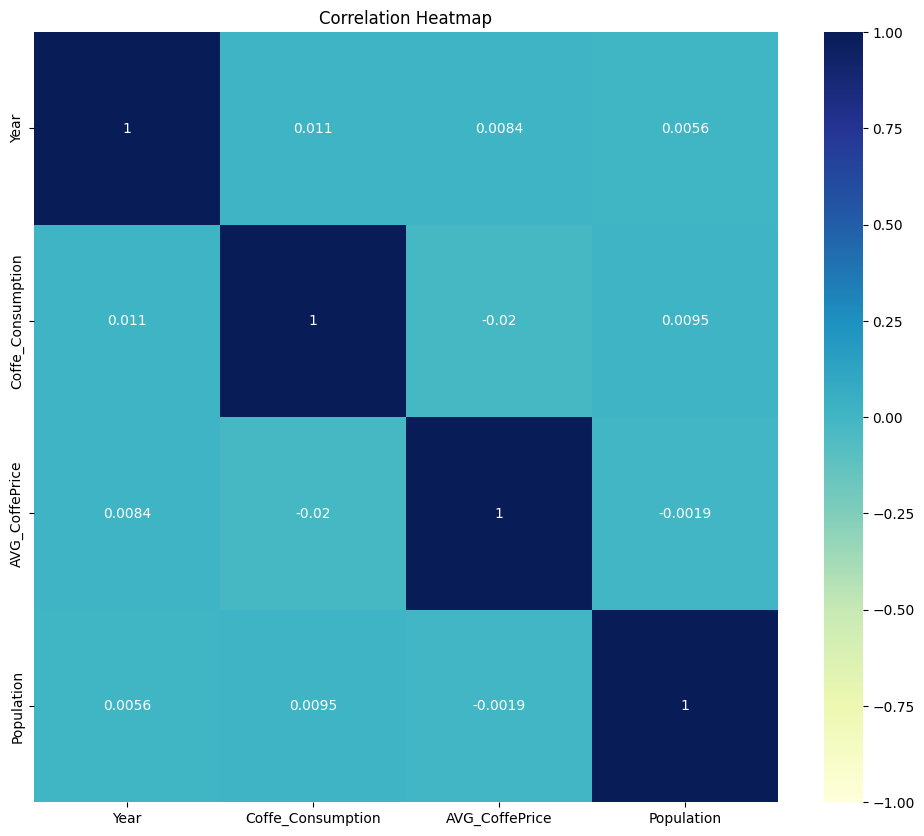

In [ ]:
# Filter DataFrame by numerical columns
numeric_data = data[numerical_columns]

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Function to create pie charts
def pie_chart(labels, values, title):
    # Create a color palette based on ocean colors
    sns.color_palette("ocean")

    # Set the color palette
    color_palette = sns.color_palette()

    # Set the style of the plot
    sns.set_style("white")
    plt.rcParams['font.family'] = 'serif'

    # Create the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(values, labels=labels, colors=color_palette, autopct="%1.1f%%")

    # Add title and legend
    plt.title(title, fontdict={'fontweight': 'bold', 'fontsize': 16})
    plt.legend(loc='upper right')

    # Display the plot
    plt.show()

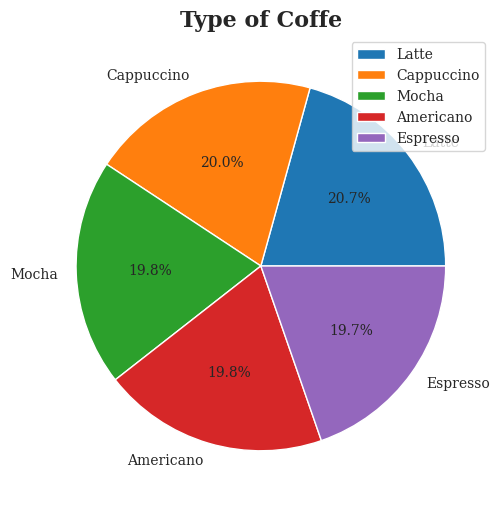

In [ ]:
# Plot pie chart for Type of Coffe
pie_chart(data['Type_of_Coffee_Consumed'].value_counts().index, data['Type_of_Coffee_Consumed'].value_counts().values, 'Type of Coffe')

In [ ]:
# Stacked Bar Chart for Coffee Types Consumed
type_counts = data.groupby(['Year', 'Type_of_Coffee_Consumed']).size().reset_index(name='Count')
fig = px.bar(type_counts, x='Year', y='Count', color='Type_of_Coffee_Consumed',
             title='Stacked Bar Chart for Coffee Types Consumed')
fig.show()


In [ ]:
# Box plot for coffee prices in different countries
fig = px.box(data, x='Country', y='AVG_CoffePrice',
             title='Distribution of Coffee Prices by Country',
             labels={'AVG_CoffePrice': 'Average Coffee Price (USD per kg)', 'Country': 'Country'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
# Get top 10 countries by average coffee consumption
top_countries = data.groupby('Country')['Coffe_Consumption'].mean().nlargest(10).index

# Filter data for top countries
top_countries_data = data[data['Country'].isin(top_countries)]

# Comparative bar plot
fig = px.bar(top_countries_data, x='Country', y='Coffe_Consumption', color='Year',
             title='Coffee Consumption of Top 10 Countries',
             labels={'Coffe_Consumption': 'Coffee Consumption (kg per capita per year)', 'Country': 'Country'},
             barmode='group')
fig.show()


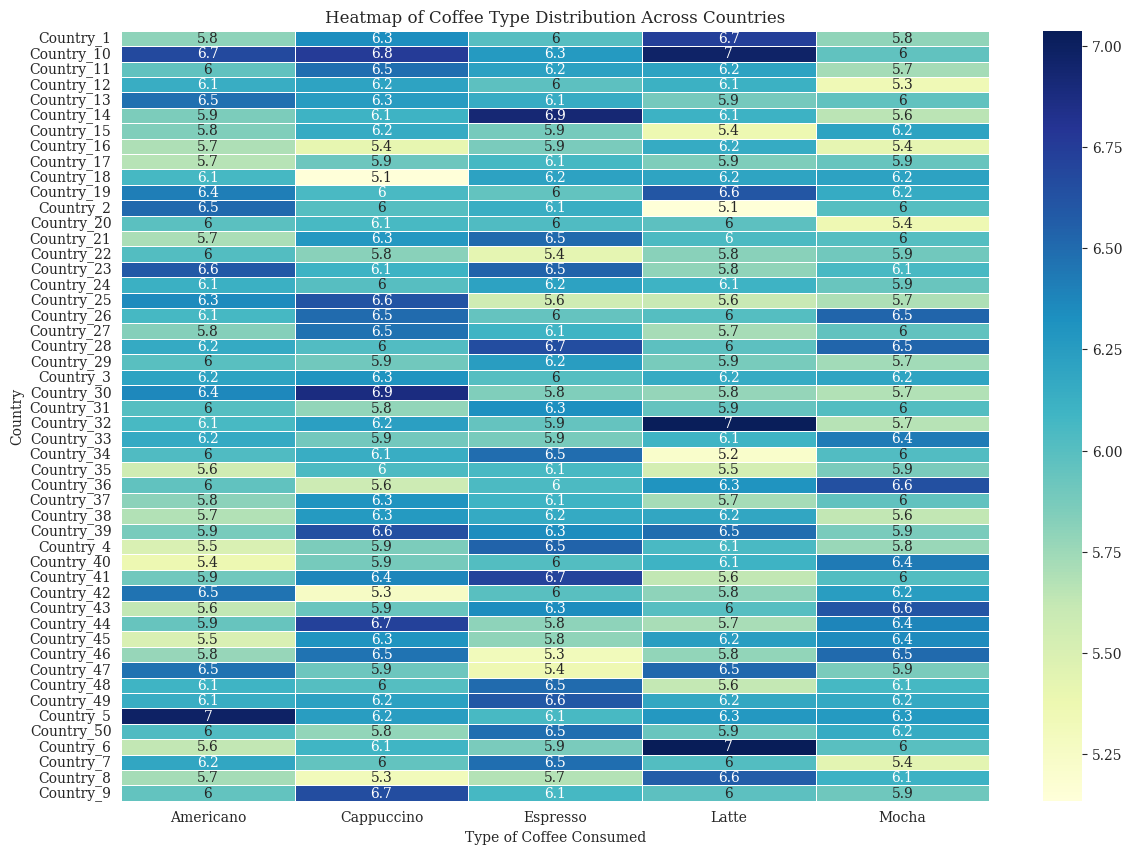

In [ ]:
# Pivot the data for the heatmap
heatmap_data = data.pivot_table(index='Country', columns='Type_of_Coffee_Consumed', values='Coffe_Consumption', aggfunc='mean').fillna(0)

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5, annot=True)
plt.title('Heatmap of Coffee Type Distribution Across Countries')
plt.xlabel('Type of Coffee Consumed')
plt.ylabel('Country')
plt.show()
